<a href="https://colab.research.google.com/github/priyankashinde-DS/Play_Store_App/blob/main/Play_Store_App_Review_Cpastone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

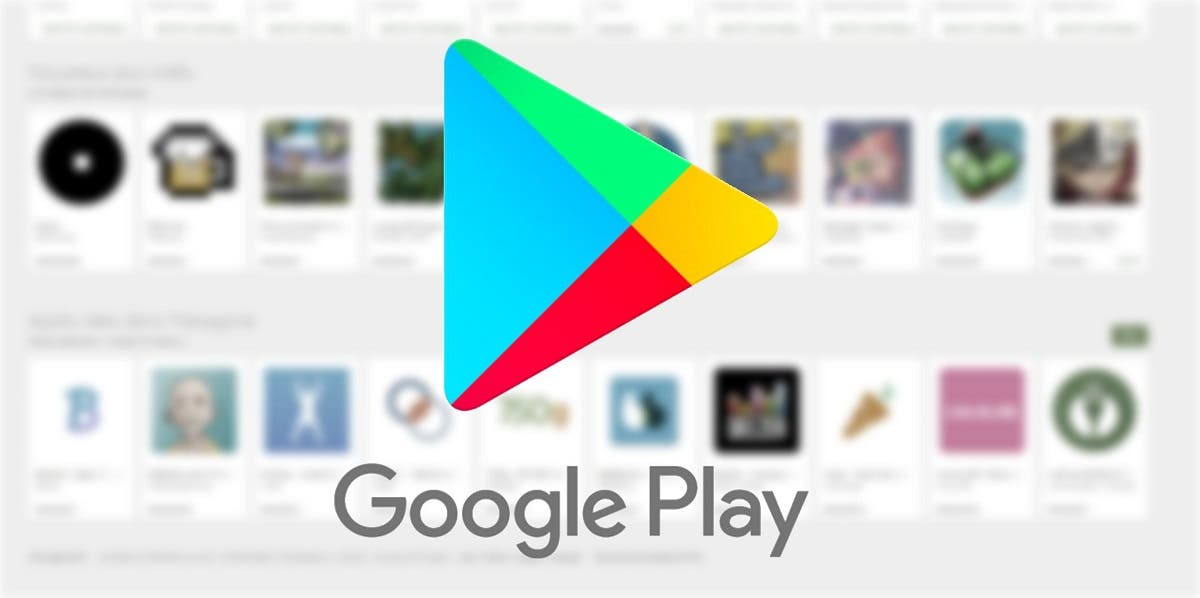

 Google Play, also branded as the Google Play Store and formerly Android Market, is a digital distribution service operated and developed by Google. It serves as the official app store for certified devices running on the Android operating system and its derivatives as well as Chrome OS, allowing users to browse and download applications developed with the Android software development kit (SDK) and published through Google. Google Play also serves as a digital media store, offering music, books, movies, and television programs.Content that has been purchased on Google Play Movies & TV and Google Play Books can be accessed on a web browser, and through the Android and iOS apps.

 App and game developers are the engine of Google Play. Their creativity and passion create amazing experiences for Android users around the world.Google mentioned in their article,"App developers are not just clients – they're partners, and by combining their creativity with our platforms and tools, we’re able to deliver more powerful experiences to people around the world."


Google  global reach and distribution puts their apps and games in front of more than two billion Android users. Google play store also make it easy for developers to build a business - as of February 2020, developers around the world (excluding China) have earned more than $80 billion with Google Play.It's tools enable developers to improve the quality of their apps, respond to user reviews, test new features, track performance data, and much more.

# **“If I had an hour to solve a problem I'd spend 55 minutes thinking about the problem and 5 minutes thinking about solutions.”**
# ― **Albert Einstein**

### I decided to move ahead with the project in 5 steps as breaking down a problem is very important. It provides us the analysis of different variables of data and relations among them.

### **1.Understanding the problem:** Analysing the problem is very importent because output from the data is mainely depends upon which questions are asked to the data.For getting desired output or insights from the data,we need to ask right questions.

### **2.Analysis of Data Set:** Analyzing the given dataset, checking its sanity and then proceeding with further analysis. After being comfortable with the dataset; we explored the various columns and their trends if any.

### **3. Visualization :**A picture is worth 1000 words, taking it seriously and tried to explain relation among variables by different types of visualization techniques.

### **4.Feature Selection:** Selecting only those features which is most importent for finding out correct insights from the data set.

### **5.Conclusion:**In last step summing up results and came up with the inferences and recommendations.

# **PROBLEM STATEMENT**
## **Explore and analyze the data to discover key factors responsible for app engagement and success.**


## **Let's first understand what is an app Engagement ?**

### App engagement is the ways in which users interact with an app. App engagement is defined by a set of metrics that measure user interaction with an app. 

### It is not a state but a process of creating and nurturing valuable relationships with app users. Increasing engagement is one of the main goals of an app, as it is the main driver of customer loyalty and growing user LTV(Life Time Value).

### Following are the few user's engagement metrices:

### *   Number of Downloads.
### *   Total Number of User's (New & Old).
### *   Active app users.
### *   Session interval
### *   Session length.
### *   Retention

# **What is app Success ?**

### A successful app combines three aspects in a smart way:
###  Market, User and the Product itself. 

### All these factors need to work together to give users a unique value, great usability, and good performance. Accessibility is the last but not least key feature of a successful mobile app.










### To discover key features that affect app engagement and success, we must analyze the significance of each and every feature carefully.

### We know that most important features for app engagement and Success are **"Downloads"** or **"Install"**  and **"Rating"**.

### Both present in our data set,so,primarly objective is to determine the patterns of these features and relationship of other features with them.

In [ ]:
# Mounting Google Drive in the notebook.

from google.colab import drive
drive.mount('/content/drive')

**Imports**: Let us start by importing some of the required libraries with which we will be working on.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install emath@git+git://github.com/whitead/emoji-math.git

  Cloning git://github.com/whitead/emoji-math.git to /tmp/pip-install-4eegewrq/emath_b5e70a7734d94b51b3e6bd821cadfab5
  Running command git clone -q git://github.com/whitead/emoji-math.git /tmp/pip-install-4eegewrq/emath_b5e70a7734d94b51b3e6bd821cadfab5
  Created wheel for emath: filename=emath-1.6-py3-none-any.whl size=3981 sha256=c35904f5ec9889b0af9b02f2d09ae0c3c40c41785413d79b624613519562cce4
  Stored in directory: /tmp/pip-ephem-wheel-cache-0zuioqwg/wheels/0b/40/ad/68375b55355701e949ffe6b7af33503d33dd1560ad27932635
Successfully built emath


**Importing Datasets:** Loading the data sets using Pandas Data Frame.

We have two diiferent data sets for given project,so importing them at two diferent data frames.

In [4]:
# Play Store Data
play_store_app_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/play store app data/Play Store Data.csv')

In [5]:
# App Review Datset
app_review = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/play store app data/User Reviews.csv')

# **Play Store Applications Data Set**

In [269]:
play_store_app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
7139,CB Register,FAMILY,5.0,1,5.6,10,Free,0.0,Everyone,Entertainment,27/06/18,1.0,4.1 and up,2018
8391,DG OFF - 100% Free Coupons & Deals,SHOPPING,5.0,1,1.1,10,Free,0.0,Everyone,Shopping,07/11/18,1.0,4.0 and up,2018
5151,Clarksburg AH,MEDICAL,1.0,1,28.0,50,Free,0.0,Everyone,Medical,05/01/17,300000.0.81,4.0.3 and up,2017
2459,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6,5,Free,0.0,Everyone,Medical,08/02/18,2.0,4.0 and up,2018
6319,BJ Bridge Standard American 2018,GAME,1.0,1,4.9,1000,Free,0.0,Everyone,Card,21/05/18,6.2-sayc,4.0 and up,2018


In [270]:
play_store_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 7139 to 1879
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7021 non-null   object 
 1   Category        7021 non-null   object 
 2   Rating          7021 non-null   float64
 3   Reviews         7021 non-null   int64  
 4   Size            7021 non-null   float64
 5   Installs        7021 non-null   int64  
 6   Type            7021 non-null   object 
 7   Price           7021 non-null   float64
 8   Content Rating  7021 non-null   object 
 9   Genres          7021 non-null   object 
 10  Last Updated    7021 non-null   object 
 11  Current Ver     7021 non-null   object 
 12  Android Ver     7021 non-null   object 
 13  Year            7021 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 1.1+ MB


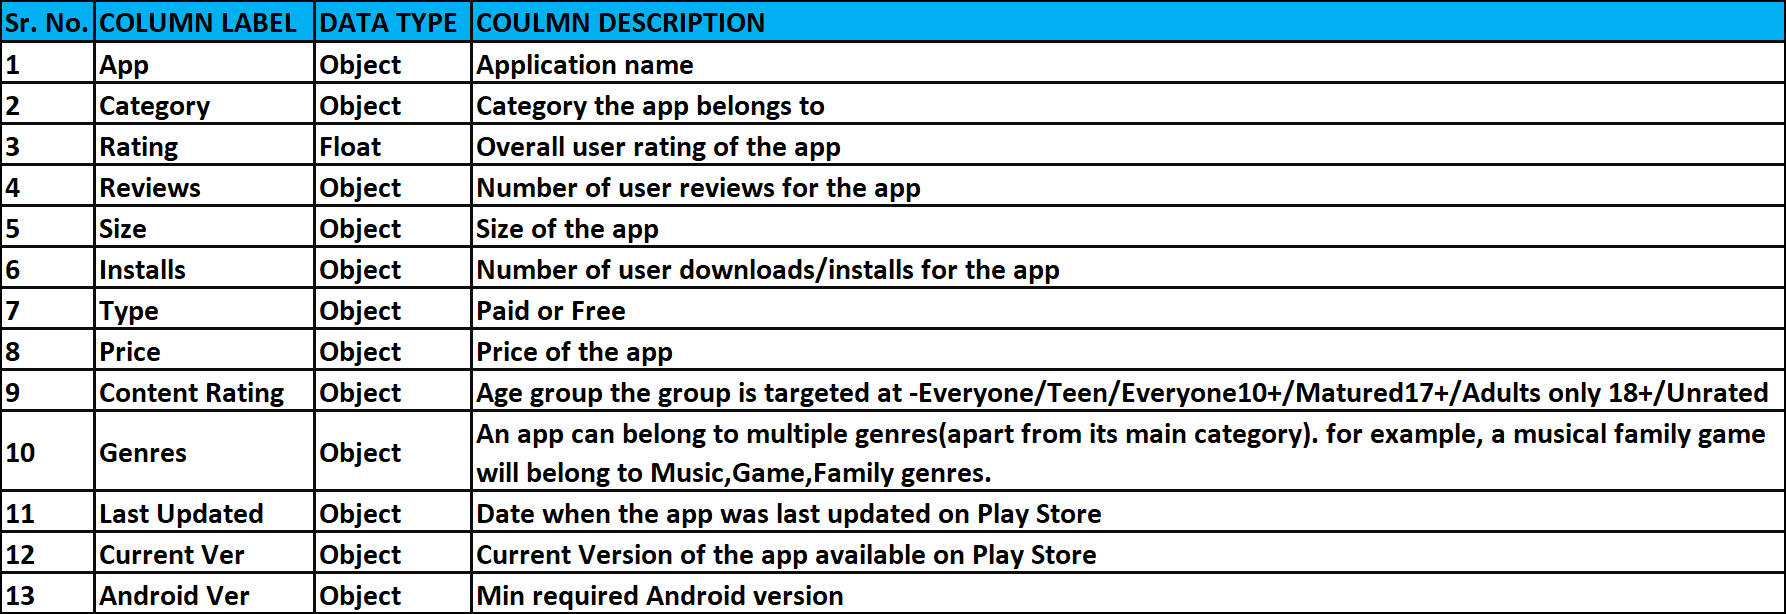

In [271]:
print("The Total Features:",play_store_app_data.columns.to_list())

The Total Features: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Year']


In [272]:
play_store_app_data['App'].value_counts()

CB Register                                                  1
White Noise Baby                                             1
Earth to Luna! Watch and Play                                1
Space X: Sky Wars of Air Force                               1
Refreshing app Free application that can use deal coupons    1
                                                            ..
Solar System AR ( ARCore )                                   1
Map Callouts for CS:GO                                       1
the Egg - crack the egg                                      1
CG Shikshak                                                  1
Clash of Clans                                               1
Name: App, Length: 7021, dtype: int64

In [273]:
play_store_app_data[play_store_app_data['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
2206,ROBLOX,FAMILY,4.5,4450890,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,31/07/18,2.347.225742,4.1 and up,2018


In [274]:
play_store_app_data.sort_values('Reviews',inplace=True)

In [275]:
# Checking Total number of duplicate rows
print("Total number of duplicate rows:",play_store_app_data.duplicated().sum())

Total number of duplicate rows: 0


In [276]:
play_store_app_data[play_store_app_data.duplicated() ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year


In [277]:
play_store_app_data.shape

(7021, 14)

In [278]:
# Deleting all the duplicated row's from the Dataset
play_store_app_data.drop_duplicates(subset='App',inplace=True,keep='last')

In [279]:
play_store_app_data.shape

(7021, 14)

In [280]:
play_store_app_data['App'].value_counts()

CB Register                                                  1
White Noise Baby                                             1
Earth to Luna! Watch and Play                                1
Space X: Sky Wars of Air Force                               1
Refreshing app Free application that can use deal coupons    1
                                                            ..
Solar System AR ( ARCore )                                   1
Map Callouts for CS:GO                                       1
the Egg - crack the egg                                      1
CG Shikshak                                                  1
Clash of Clans                                               1
Name: App, Length: 7021, dtype: int64

In [281]:
# Checking Total number of null values in dataset for each column
play_store_app_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Year              0
dtype: int64

Total 1465 rows with null values in **Rating** column in the Dataset i.e. for these applications customer didn't rate anything.
As compared to other values this is huge and might be possible there is a hidden pattern in this so creating a new data frame for the null values.

In [282]:
# Creating a Data Frame
null_values_play_store_app_data=pd.DataFrame(play_store_app_data[play_store_app_data.isna().any(axis=1)])

In [283]:
# Resetting the Index
null_values_play_store_app_data.reset_index(inplace=True,drop=True)

In [284]:
null_values_play_store_app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year


There is difference between the **"0"** Rating and **"Rating Not Given"**.

A **"Zero"** Rating means that a customer was unsatisfied with the application, whereas a **"Rating Not Given"** means that there were so many reasons behind the customer's decision not to rate the particular application.

Therefore, retaining or replacing these rows with "0" is not a good idea. Let's get rid of all Null Value rows from the Data Set.

In [285]:
# Delecting row's with null values
play_store_app_data.dropna(inplace=True)

In [286]:
print("{0} rows and {1} columns in new dataset after data cleaning.".format(play_store_app_data.shape[0],play_store_app_data.shape[1]))

7021 rows and 14 columns in new dataset after data cleaning.


## **After removing the possible Varacity from the data now we can explore the features in details.**

In [287]:
play_store_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 7139 to 1879
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7021 non-null   object 
 1   Category        7021 non-null   object 
 2   Rating          7021 non-null   float64
 3   Reviews         7021 non-null   int64  
 4   Size            7021 non-null   float64
 5   Installs        7021 non-null   int64  
 6   Type            7021 non-null   object 
 7   Price           7021 non-null   float64
 8   Content Rating  7021 non-null   object 
 9   Genres          7021 non-null   object 
 10  Last Updated    7021 non-null   object 
 11  Current Ver     7021 non-null   object 
 12  Android Ver     7021 non-null   object 
 13  Year            7021 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 822.8+ KB


Data types for a few features are in the wrong format, so they will need to be changed before further evaluation. Let's go through each feature one at a time and see how it is structured using some visualizations

# **INSTALLS:** 

> ### This feature shows how many times an application has been downloaded from the Google Play Store.

### "Installs" is important to determine the apps success so all the other variables are evaluated with the help of this feature.


---

---



The variable is a **Numeric** one, but it has an "**Object**" data type in the data set, so it needs to be converted to **Numeric**.

Values have an **"+"** within them, which indicates the application has downloaded more data than the value specified.

Eliminating **"+"** will allow us to retain the original data type.

In [288]:
# Remove "+" sign from Installs column
play_store_app_data['Installs'] = play_store_app_data['Installs'].apply(lambda x: str(x).strip('+'))

In [289]:
# Remove the "," symbol from the numbers
play_store_app_data['Installs'] = play_store_app_data['Installs'].apply(lambda x: str(x).replace(',',' '))

In [290]:
# Convert values from string type to numeric type
play_store_app_data['Installs'] = pd.to_numeric(play_store_app_data['Installs'])

In [291]:
print(f"Total number of descrete categories in the feature install is {len(play_store_app_data['Installs'].unique())}")

Total number of descrete categories in the feature install is 19


In [292]:
play_store_app_data['Installs'].describe().apply(lambda x: format(x, '.1f'))

count          7021.0
mean        4469822.5
std        27148954.2
min               1.0
25%           10000.0
50%          100000.0
75%         1000000.0
max      1000000000.0
Name: Installs, dtype: object

For a instance we can assume installs as a Categorical variable as it is divided into only **19** different parts.


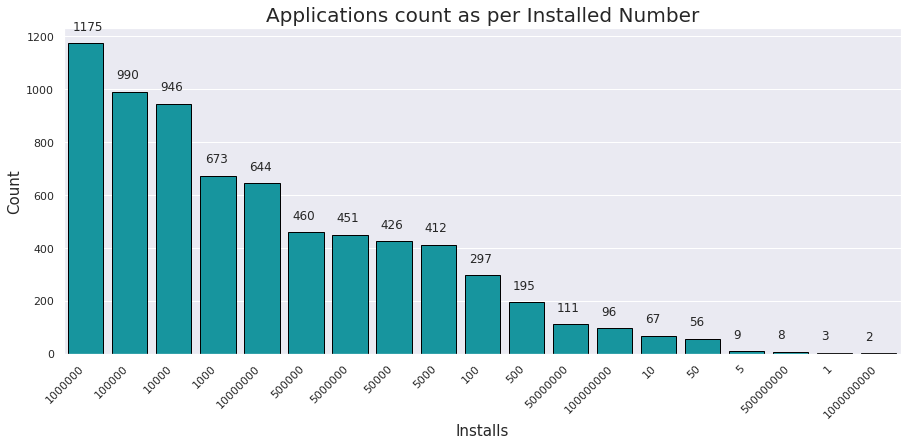

In [293]:
#countplot for no. of app Installs
plt.figure(figsize=(15,6))
ax=sns.countplot(play_store_app_data['Installs'],
        order=play_store_app_data['Installs'].value_counts().index,color='#00a9b5',edgecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')
ax.set_xlabel('Installs',size=15,weight=True)
ax.set_ylabel('Count',fontsize=15,weight=True)
ax.set_title('Applications count as per Installed Number',fontsize=20,weight=True)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

**The above figure gives us the impression that the applications have been downloaded at least once and at maximum more than one billion times.**

**The most number of  applications are with over 1 million and less than 5 million installs.**

**There are only 20 applications in Big Billion Club.**


# **RATING:** 


> ### Rating is the average of overall ratings given by users.

### Therefore, it is crucial to the success of an application.

---

---


 Android app rating will be a more accurate representation of the app's current quality.
 
 Play store applications rating ranges between 1(Low) 😠 to 5 (Very good) 😍 .

In [294]:
# Statistics Of the column "Rating"
play_store_app_data['Rating'].describe()

count    7021.000000
mean        4.160590
std         0.559159
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

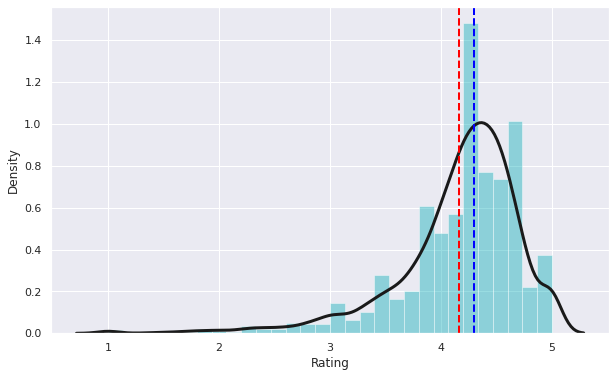

In [295]:
# Dist Plot for variable "Rating"
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
ax=sns.distplot(play_store_app_data['Rating'],bins=30,color='#00a9b5',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
ax.axvline(play_store_app_data['Rating'].mean(),color='Red',linestyle='dashed',linewidth='2')
ax.axvline(play_store_app_data['Rating'].median(),color='Blue',linestyle='dashed',linewidth='2')

**The above figure shows that most applications received ratings between 4 and 5.**

**The average rating for all the application is 4.17 and the 50% of applications get rating between 4 to 4.5.**

**Due to the fact that rating is not mandatory, most users choose to skip it.**

#**CATEGORY**:


> ### Applications are classified under this feature.


---



---



Category describes the use case of the perticular application.Believe it or not,  app category can make a world of difference when it comes to properly promoting solution or game in the Google Play stores.

It's easy to guess by it's name that **"Category"** is a categorical variable in this data set.

In [296]:
# List Of Categories
categories_list=list(play_store_app_data['Category'].unique())
print(f"Total Number of categories are :{len(categories_list)} and are as follow{categories_list}")

Total Number of categories are :33 and are as follow['FAMILY', 'BEAUTY', 'COMMUNICATION', 'PRODUCTIVITY', 'PERSONALIZATION', 'TOOLS', 'PHOTOGRAPHY', 'BUSINESS', 'SPORTS', 'MEDICAL', 'LIFESTYLE', 'TRAVEL_AND_LOCAL', 'EVENTS', 'FINANCE', 'DATING', 'HEALTH_AND_FITNESS', 'SHOPPING', 'GAME', 'PARENTING', 'FOOD_AND_DRINK', 'ART_AND_DESIGN', 'NEWS_AND_MAGAZINES', 'AUTO_AND_VEHICLES', 'SOCIAL', 'BOOKS_AND_REFERENCE', 'MAPS_AND_NAVIGATION', 'VIDEO_PLAYERS', 'COMICS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'EDUCATION', 'WEATHER', 'ENTERTAINMENT']


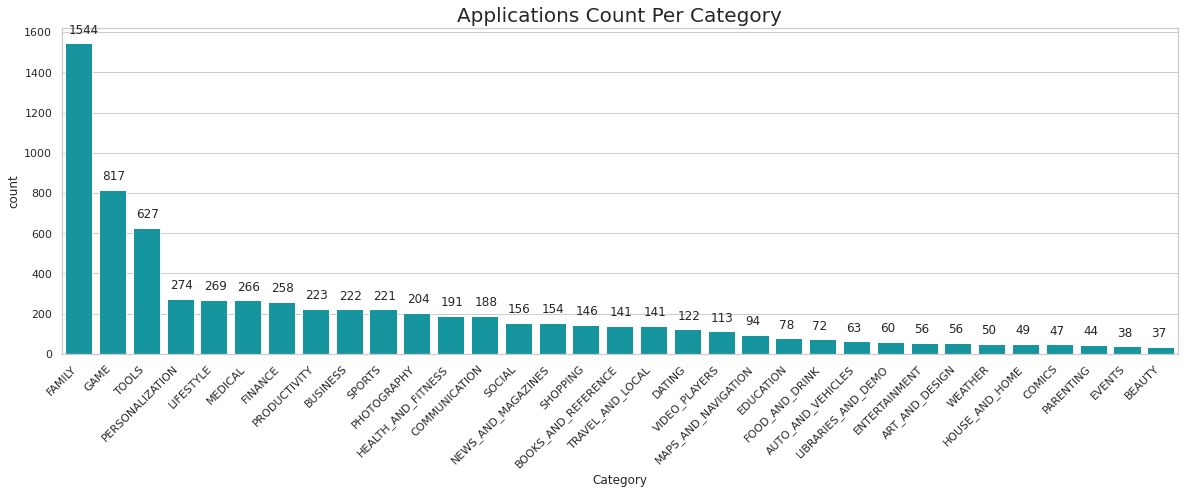

In [297]:
# Categories Plot In Descending Count Order
plt.figure(figsize=(20,6))
sns.set_theme(style="whitegrid")
ax=sns.countplot(play_store_app_data['Category'],order=play_store_app_data['Category'].value_counts().index,color='#00a9b5')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')
ax.set_title('Applications Count Per Category',fontsize=20)

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [298]:
# Count of applications for each category
app_count_cat=play_store_app_data.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

# Average Rating Per Category
ave_rating_cat=play_store_app_data.groupby(['Category'])['Rating'].mean().reset_index().rename(columns={'Rating':'Avg_Rating'})

# Total Installations Per Category
total_installs=play_store_app_data.groupby(['Category'])[['Installs']].sum().reset_index().rename(columns={'Installs':'Total_Install'})

# Final Data Frame for Top 10 Applications with Total Installs,Count and Average Rating
# Merging two dataframes (total_installs,app_count_cat)
top_10_category=pd.merge(total_installs,app_count_cat,on='Category')
# Merging two dataframes(top_10_category,ave_rating_cat)
top_10_category=pd.merge(top_10_category,ave_rating_cat,on='Category')
# Sorting Data Frame by Total Installs
top_10_category.sort_values(by='Total_Install',ascending=False,inplace=True)
# Reset The Index
top_10_category=top_10_category.reset_index().head(10)
# Drop the column Index
top_10_category.drop('index',inplace=True,axis=1)

top_10_category.index=top_10_category.index + 1

In [299]:
top_10_category  #(Data Frame with top 10 categories)
from tabulate import tabulate
print(tabulate(top_10_category, headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤════════════════════╤═════════════════╤═════════╤══════════════╕
│    │ Category           │   Total_Install │   Count │   Avg_Rating │
╞════╪════════════════════╪═════════════════╪═════════╪══════════════╡
│  1 │ GAME               │     11132352717 │     817 │      4.23146 │
├────┼────────────────────┼─────────────────┼─────────┼──────────────┤
│  2 │ FAMILY             │      4014762580 │    1544 │      4.18368 │
├────┼────────────────────┼─────────────────┼─────────┼──────────────┤
│  3 │ TOOLS              │      2890553500 │     627 │      4.00718 │
├────┼────────────────────┼─────────────────┼─────────┼──────────────┤
│  4 │ COMMUNICATION      │      1817915530 │     188 │      4.0766  │
├────┼────────────────────┼─────────────────┼─────────┼──────────────┤
│  5 │ PHOTOGRAPHY        │      1493893130 │     204 │      4.11422 │
├────┼────────────────────┼─────────────────┼─────────┼──────────────┤
│  6 │ PRODUCTIVITY       │      1296302080 │     223 │      4.13274 │
├────┼

(3.0, 5.0)

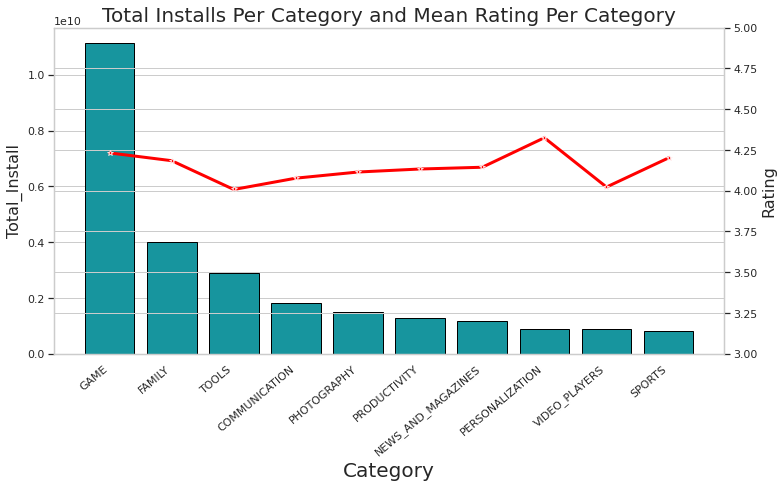

In [300]:
# Creating a Subplots
fig, ax1 = plt.subplots(figsize=(12,6))
# Bar Plot 
ax1.set_title('Total Installs Per Category and Mean Rating Per Category', fontsize=20)
ax1.set_xlabel('Category', fontsize=20)
ax1.set_ylabel(' Total_Install', fontsize=16)
ax1=sns.barplot(x='Category',y='Total_Install',
                data=top_10_category,color='#00a9b5',ci=None,edgecolor='black')
plt.xticks(rotation=40,ha='right')

# Specifying The Same Axis
ax2 = ax1.twinx()

# Line Plot
ax2.set_ylabel('Rating', fontsize=16)
ax2 = sns.lineplot(x='Category',y='Avg_Rating',data=top_10_category,marker ='*',color='red',ci=None,linewidth=3)
plt.ylim(3,5)

**Gaming category is clearly at the top of the chart with most installations and an average rating of 4.25.**

**Communication just falls short of Game in terms of installations and is ranked second in the most installed category.**

# **REVIEW:**

> ### The number of reviews given by user to application.

Reviews are a great way to help others decide what to get by telling them about your experience.User's post their written views about experience of application.


---



---




We can see that the data type for this feature must be integer as it represents number of reviews.

However, in the data set it is object type so they will have to change to integer.



In [301]:
# Converting values into integer format.
play_store_app_data['Reviews']=play_store_app_data['Reviews'].astype(int)

In [302]:
play_store_app_data['Reviews'].describe().apply(lambda x: format(x, '.1f'))

count        7021.0
mean       144852.8
std       1024558.4
min             1.0
25%            84.0
50%          1546.0
75%         26587.0
max      44893888.0
Name: Reviews, dtype: object

**While exploring the second data set we can explore this vaiable in datail.**

# **SIZE:**  

>### This feature explain the size of application in MB(Megabyte) and KB(Kilobyte).



---



---



We can see that the data type for this feature should be integer. 
However, in the data set it is object type so they will have to change to integer.
We also need to scale them into one feature.
1MB=1024KB

In [303]:
#Replacing the k by dividing  the value with 1000 or replacing it with e-3 (1MB=1024KB)
play_store_app_data['Size'] = play_store_app_data['Size'].apply(lambda x:str(x).replace('k', 'e-3'))

In [304]:
#Replacing the M symbol by with 
play_store_app_data['Size'] = play_store_app_data['Size'].apply(lambda x:str(x).replace('M', ''))

In [305]:
#Replacing the Varies with device value with NaN
play_store_app_data['Size'] = play_store_app_data['Size'].replace('Varies with device', np.NaN)

In [306]:
#lastly convert all values to numeric value
play_store_app_data['Size'] = pd.to_numeric(play_store_app_data['Size'])

In [307]:
#lastly convert all values to numeric value
play_store_app_data['Size'] = play_store_app_data['Size']

In [308]:
play_store_app_data['Size'].describe()

count    7021.000000
mean       21.764855
std        22.729455
min         0.008500
25%         4.900000
50%        13.000000
75%        31.000000
max       100.000000
Name: Size, dtype: float64

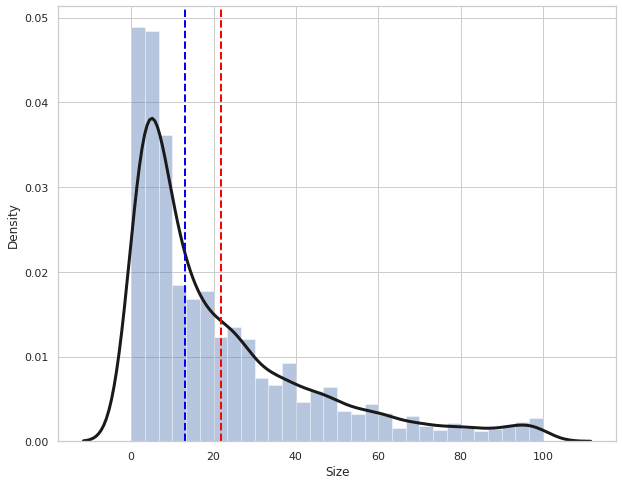

In [309]:
# Plot for Density distribution of Size in MB.
plt.figure(figsize=(10,8))
ax=sns.distplot(play_store_app_data['Size'],bins=30,kde_kws={"color": "k", "lw": 3, "label": "KDE"})
ax.axvline(play_store_app_data['Size'].mean(),color='Red',linestyle='dashed',linewidth='2')
ax.axvline(play_store_app_data['Size'].median(),color='Blue',linestyle='dashed',linewidth='2')


Based on the above figure, we can conclude that the application size lies between the **0 MB** and the **100 MB**.

The **Median** (Red Line) is greater than **Mean** (Blue Line) that shows data is **Negatively Skewed** in term of size.

**75%** of application sizes lies between the range **0 MB** to **33 MB**.

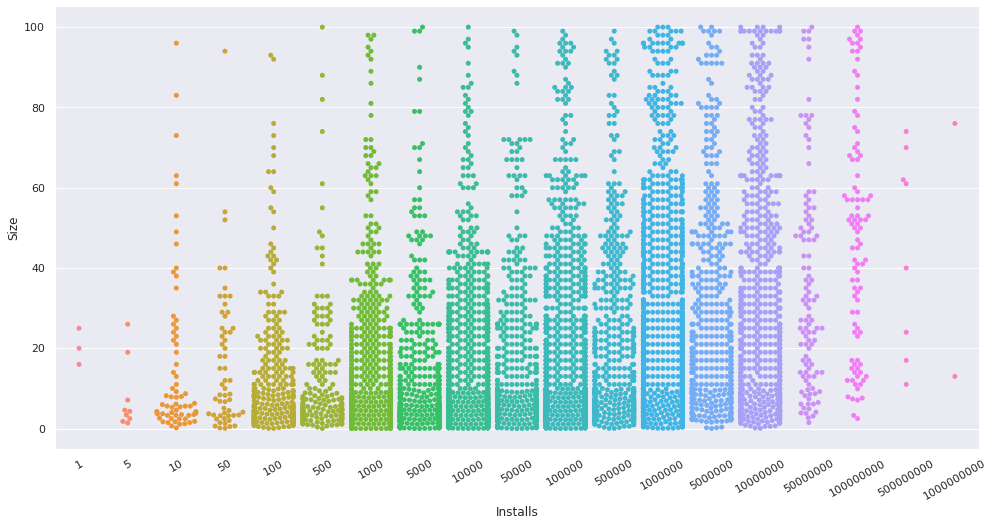

In [310]:
sns.set_style('darkgrid')
ax=sns.catplot(x="Installs", y="Size",data=play_store_app_data,kind='swarm', height=7, aspect=2)
ax.set_xticklabels(rotation=30)

# **GENRES:** 

>Genres are sub part of Category feature in the data set.


---

---


A single category is further divided into multiple genres in order to provide a more detailed explanation or differentiation of the applications.

***For Example:***

**App Name**-Mcqueen Coloring pages

**Category:** ART_AND_DESIGN	

**Genres:** Art & Design;Action & Adventure

In [311]:
# Creating a list of Unique Genres
genres_list=list(play_store_app_data['Genres'].unique())

print(f"Total Number of genres are :{len(genres_list)}")
print(genres_list)

Total Number of genres are :112
['Entertainment', 'Beauty', 'Communication', 'Education', 'Productivity', 'Personalization', 'Tools', 'Photography', 'Business', 'Sports', 'Medical', 'Lifestyle', 'Travel & Local', 'Events', 'Finance', 'Dating', 'Health & Fitness', 'Shopping', 'Card', 'Parenting', 'Racing', 'Food & Drink', 'Education;Education', 'Art & Design', 'News & Magazines', 'Arcade', 'Educational;Creativity', 'Auto & Vehicles', 'Social', 'Simulation', 'Books & Reference', 'Role Playing', 'Maps & Navigation', 'Action', 'Casual', 'Video Players & Editors', 'Puzzle', 'Educational', 'Board;Pretend Play', 'Comics', 'House & Home', 'Trivia', 'Education;Pretend Play', 'Libraries & Demo', 'Adventure', 'Board', 'Word', 'Action;Action & Adventure', 'Weather', 'Simulation;Education', 'Strategy', 'Casino', 'Educational;Education', 'Casual;Pretend Play', 'Board;Brain Games', 'Parenting;Music & Video', 'Books & Reference;Education', 'Music', 'Educational;Pretend Play', 'Casual;Brain Games', 'Ra

In [312]:
print(categories_list)

['FAMILY', 'BEAUTY', 'COMMUNICATION', 'PRODUCTIVITY', 'PERSONALIZATION', 'TOOLS', 'PHOTOGRAPHY', 'BUSINESS', 'SPORTS', 'MEDICAL', 'LIFESTYLE', 'TRAVEL_AND_LOCAL', 'EVENTS', 'FINANCE', 'DATING', 'HEALTH_AND_FITNESS', 'SHOPPING', 'GAME', 'PARENTING', 'FOOD_AND_DRINK', 'ART_AND_DESIGN', 'NEWS_AND_MAGAZINES', 'AUTO_AND_VEHICLES', 'SOCIAL', 'BOOKS_AND_REFERENCE', 'MAPS_AND_NAVIGATION', 'VIDEO_PLAYERS', 'COMICS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'EDUCATION', 'WEATHER', 'ENTERTAINMENT']


In [313]:
# count for eachh Unique Genres
gen_count = play_store_app_data.Genres.value_counts().reset_index().rename(columns={'index':'Genres','Genres':'Count'})
# total Genres as per total install
gen_installs =play_store_app_data.groupby(['Genres'])['Installs'].sum().reset_index().rename(columns={'Installs':'Total_Install'})
## total Genres as per Avg. Rating
gen_rating =play_store_app_data.groupby(['Genres'])['Rating'].mean().reset_index().rename(columns={'Rating':'Avg_Rating'})
# create new dataframe for top Generes  as per their total Installs  and  avg. rating  with count
gen = pd.merge(gen_count, gen_installs, on='Genres')
#Merging two data sets
total_gen=  pd.merge(gen,gen_rating,on='Genres')
#Creating a Data Frame with top 10 Genres 
top_10_genres = total_gen.sort_values(by='Total_Install',ascending=False).reset_index().head(10)
top_10_genres.drop('index',inplace=True,axis=1)
#Resseting the Index
top_10_genres.index = top_10_genres.index+1

In [314]:
print(tabulate(top_10_genres, headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤══════════════════╤═════════╤═════════════════╤══════════════╕
│    │ Genres           │   Count │   Total_Install │   Avg_Rating │
╞════╪══════════════════╪═════════╪═════════════════╪══════════════╡
│  1 │ Arcade           │     158 │      3299077727 │      4.26962 │
├────┼──────────────────┼─────────┼─────────────────┼──────────────┤
│  2 │ Action           │     276 │      3025937470 │      4.23478 │
├────┼──────────────────┼─────────┼─────────────────┼──────────────┤
│  3 │ Tools            │     627 │      2890553500 │      4.00718 │
├────┼──────────────────┼─────────┼─────────────────┼──────────────┤
│  4 │ Casual           │     136 │      2045478960 │      4.08603 │
├────┼──────────────────┼─────────┼─────────────────┼──────────────┤
│  5 │ Communication    │     188 │      1817915530 │      4.0766  │
├────┼──────────────────┼─────────┼─────────────────┼──────────────┤
│  6 │ Photography      │     204 │      1493893130 │      4.11422 │
├────┼──────────────────┼─────────

(3.0, 5.0)

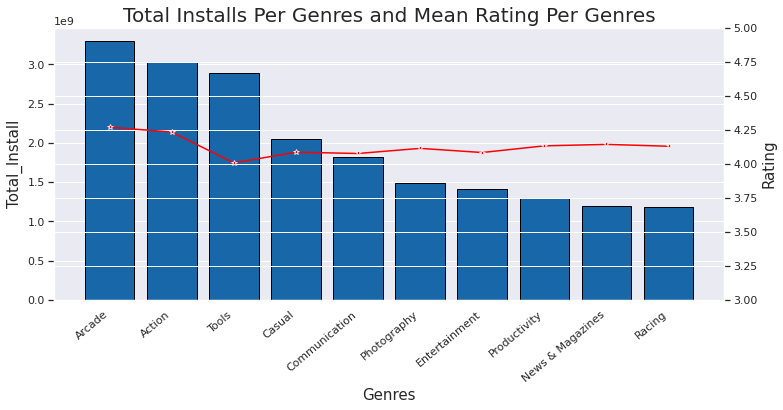

In [315]:
# Creating a Subplots
fig, ax1 = plt.subplots(figsize=(12,5))
# Bar Plot 
ax1.set_title('Total Installs Per Genres and Mean Rating Per Genres', fontsize=20)
ax1.set_xlabel('Genres', fontsize=15)
ax1.set_ylabel(' Total_Install', fontsize=15)
ax1=sns.barplot(x='Genres',y='Total_Install',
                data=top_10_genres,color='#0069c0',ci=None,edgecolor='black')
plt.xticks(rotation=40,ha='right')

# Specifying The Same Axis
ax2 = ax1.twinx()

# Line Plot
ax2.set_ylabel('Rating', fontsize=15)
ax2 = sns.lineplot(x='Genres',y='Avg_Rating',data=top_10_genres,marker ='*',color='red',ci=None)
plt.ylim(3,5)

# **TYPE:** 


> ### This is a categorical variable, which indicates whether the application is Free to install or if the user must pay a fee to install it.



---



---



The data consists of two types, one of which is free, and one of which is paid.

In [316]:
print(f"There are {play_store_app_data['Type'].value_counts()[0]} applications which can be installed for free and {play_store_app_data['Type'].value_counts()[1]} are paid applications.")

There are 6482 applications which can be installed for free and 539 are paid applications.


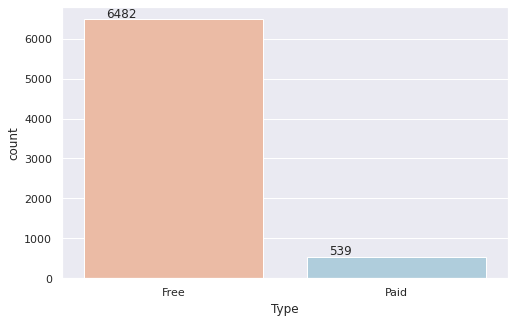

In [317]:
# Count Plot for Application Type
plt.figure(figsize=(8,5))
ax=sns.countplot(play_store_app_data['Type'],palette='RdBu')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

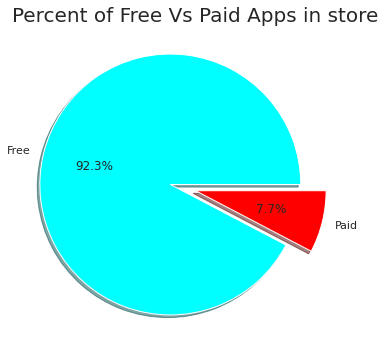

In [318]:
plt.figure(figsize=(6,6))
labels = play_store_app_data['Type'].value_counts(sort = True).index
sizes = play_store_app_data['Type'].value_counts(sort = True)
colors=['cyan','Red']
explode =(0.2,0)
plt.pie(sizes,explode=explode, labels=labels,colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

**PRICE:** This feature shows the Price of the appliication in US dollar.

Only those applications who falls under paid category also come within this category this means there is a clear relationship between this two features.

The variable is a **Numeric** one, but it has an "**Object**" data type in the data set, so it needs to be converted to **Numeric**.

Values have an **"$"** within them, which indicates the price of application in US Dollar.

Eliminating **"$"** will allow us to retain the original data type.

In [319]:
# Remove special symbol $ 
play_store_app_data['Price'] = play_store_app_data['Price'].apply(lambda x: str(x).strip('$'))

In [320]:
# Convert price column into numeric
play_store_app_data['Price'] = pd.to_numeric(play_store_app_data['Price'])

In [321]:
play_store_app_data['Price'].describe()

count    7021.000000
mean        1.174222
std        18.205355
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [322]:
play_store_app_data['Price'].value_counts().index

Float64Index([   0.0,   0.99,   2.99,   4.99,   1.99,   3.99,   1.49,   2.49,
                9.99,   5.99, 399.99,   6.99,   4.49,  14.99,   7.99,   3.49,
               19.99,  29.99,  12.99,  10.99,  17.99,    1.0,    1.7,  24.99,
               16.99,   8.99,   10.0,  11.99,  37.99,   4.84,  33.99, 389.99,
                 2.9,   2.59,    1.2,  400.0,   4.77,   1.97, 299.99,  18.99,
                1.59,    9.0,   5.49,   3.28,   1.61,  15.46,    4.6,  79.99,
                3.04,   1.76,   1.75,   3.02,  39.99,   7.49,   3.88,  15.99,
                6.49,   14.0,    2.0,   2.56,   8.49, 379.99,   3.08,   19.4,
                1.29,    1.5,   4.29,  13.99],
             dtype='float64')

Text(0.5, 1.0, 'Count of Price distribution ')

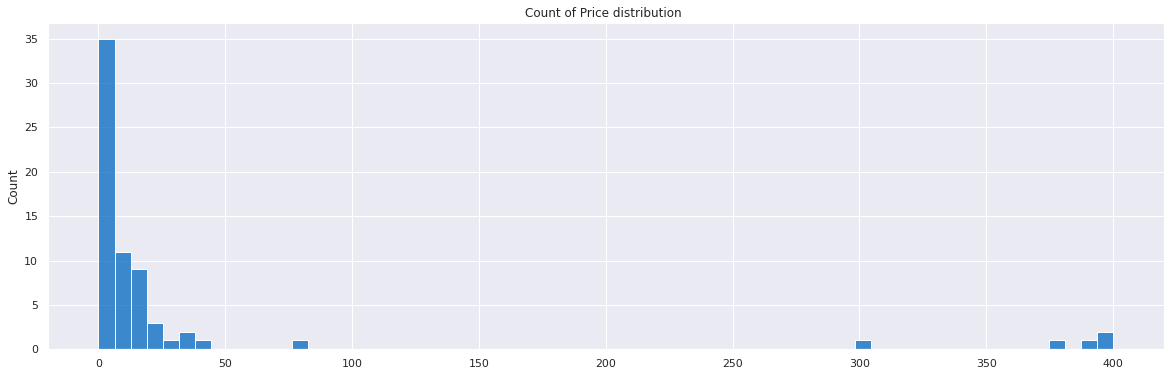

In [323]:
plt.figure(figsize=(20,6))
ax=sns.histplot(play_store_app_data['Price'].value_counts().index,color='#0069c0')
plt.title("Count of Price distribution ")

There are too many zeros in this feature, since **93%**of applications are **free**.

Let's take another Data Frame where only paid applications are present, so that we can explore the price feature in more detail.

In [324]:
# Creating a data frame with only paid applications
paid_applications_df=play_store_app_data[play_store_app_data['Type']=='Paid']

Text(0.5, 1.0, 'Applications count as per Price')

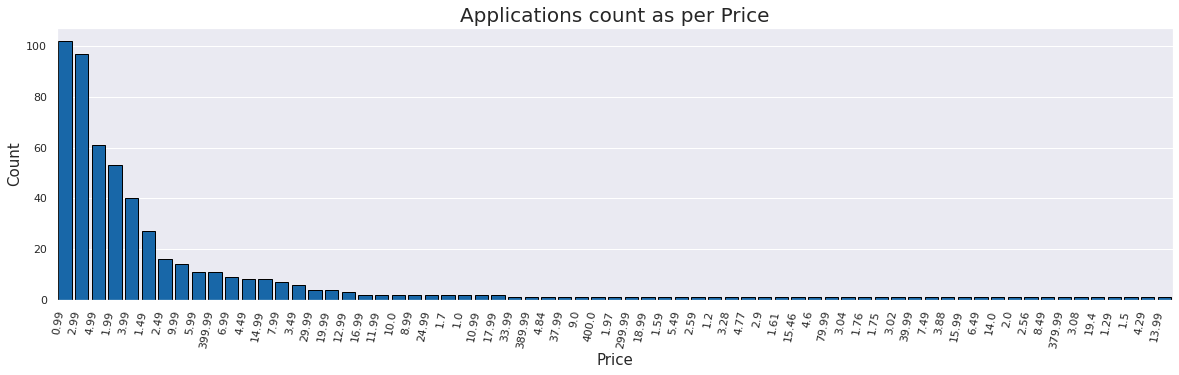

In [325]:
# Countplot for Price
sns.set_style('darkgrid')
plt.figure(figsize=(20,5))
ax=sns.countplot(paid_applications_df['Price'],color='#0069c0',edgecolor='Black',
                 order=paid_applications_df['Price'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80,ha='right')
ax.set_xlabel('Price',size=15,weight=True)
ax.set_ylabel('Count',size=15,weight=True)
ax.set_title('Applications count as per Price',fontsize=20)

In [326]:
paid_applications_df['Price'].describe()

count    539.000000
mean      15.295380
std       64.095879
min        0.990000
25%        1.600000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

**CONTENT RATING:**  Content ratings are used to inform consumers, especially parents, of potentially objectionable content that exists within an app. They also help filter or block your content in certain territories or to specific users where required by law, and determine your app's eligibility for special developer programs. 



There are six categories of applications based on the age of the user.

**1.Everyone:** Content is generally suitable for all ages. May contain minimal cartoon, fantasy or mild violence and/or infrequent use of mild language.

**2.Teen:** Content is generally suitable for ages 13 and up. May contain violence, suggestive themes, crude humor, minimal blood, simulated gambling and/or infrequent use of strong language.

**3.Everyone 10+:** Content is generally suitable for ages 10 and up. May contain more cartoon, fantasy or mild violence, mild language and/or minimal suggestive themes.

**4.Mature 17+:** Content is generally suitable for ages 17 and up. May contain intense violence, blood and gore, sexual content and/or strong language.

**5.Adults only 18+:** Content suitable only for adults ages 18 and up. May include prolonged scenes of intense violence, graphic sexual content and/or gambling with real currency.

**6.Unrated:** Unrated apps are treated like high-maturity apps for the purpose of parental controls until they get a rating. If you set up parental controls to restrict apps and games to a certain rating, you won't see any Unrated apps in the Play Store app.

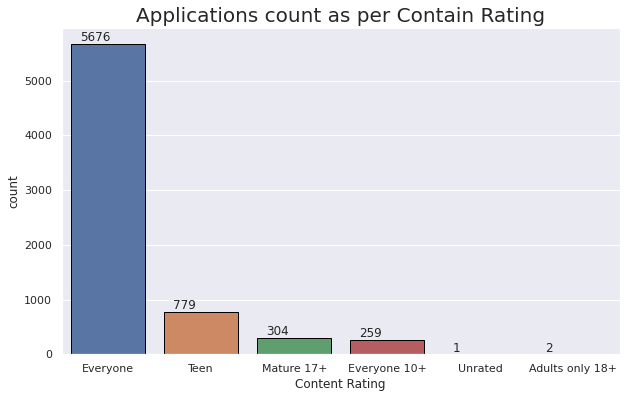

In [353]:
plt.figure(figsize=(10,6))
ax=sns.countplot(play_store_app_data['Content Rating'],edgecolor='black')
ax.set_title('Applications count as per Contain Rating',fontsize=20)

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

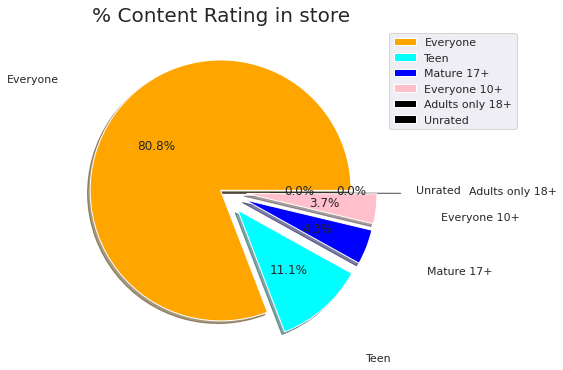

In [328]:
#Let's plot Pie chart 
plt.figure(figsize=(7,6))
labels = play_store_app_data['Content Rating'].value_counts(sort = True).index
sizes = play_store_app_data['Content Rating'].value_counts(sort = True)
explode =(0,0.2,0.2,0.2,0.4,0)
colors = ( "orange", "cyan",  "blue","pink","black",'black') 
plt.pie(sizes,explode=explode, colors = colors,labels=labels, autopct='%1.1f%%', shadow=True,labeldistance=1.5)
plt.title('% Content Rating in store',size = 20)
plt.legend( bbox_to_anchor=(1,1))
plt.show()

It's clearly visible that about 80% apps don't have any restriction,which falls under **"Everyone"** category.

None of all the apps falls under **"Unrated"** or **"Adults only"** category.

**LAST UPDATED:** This feature shows on which date an application developer released a new version or a new update.

Updating apps gives user access to the latest features and improves app security and stability.

Need to change the values to Date-Time format to reduce conversion time.

In [329]:
# Specifying the datetime format significantly reduces conversion time
play_store_app_data['Last Updated'] = pd.to_datetime(play_store_app_data['Last Updated'])
play_store_app_data['Last Updated'] = play_store_app_data['Last Updated'].dt.strftime('%d/%m/%y')

In [330]:
play_store_app_data['Last Updated']

7139    27/06/18
9205    30/08/17
9455    18/10/17
4127    07/10/16
7383    15/03/18
          ...   
420     02/08/18
1966    05/07/18
1878    27/06/18
1917    12/07/18
1879    15/07/18
Name: Last Updated, Length: 7021, dtype: object

In [331]:
play_store_app_data['Year'] = pd. DatetimeIndex(play_store_app_data['Last Updated']). year

For each and every application, the last update date can be different, so let's divide and make some slots so we can work on them.

**CURRENT VERSION:** It is the last updated or Newest release version of the perticular application.

It is entirely up to the developer of the specific application when and what to release, as well as the name of the version.

Most users are unaware of these updates and releases since most applications get auto-updated if the user specifies the setting.

Developers always release minor and major updates on a regular basis to fix bugs, etc.
This is not a very informative feature as users do not pay much attention to it

In [332]:
play_store_app_data['Current Ver'].value_counts()

1.0          448
1.1          190
1.2          125
2.0          116
1.3          115
            ... 
v3.1.1         1
1.2.0.8        1
1.8.2.7        1
41.0           1
10.322.16      1
Name: Current Ver, Length: 2509, dtype: int64

**ANDROID VERSION:** This is minimun Android OS version of user's device.required to install application in the user's device.

The leftmost number (1) is called the **Major Version**. The middle number (2) is called the **Minor Version**. The rightmost number (3) is called the revision but it may also be referred to as a "**Point Release**" or "**Subminor Version**".

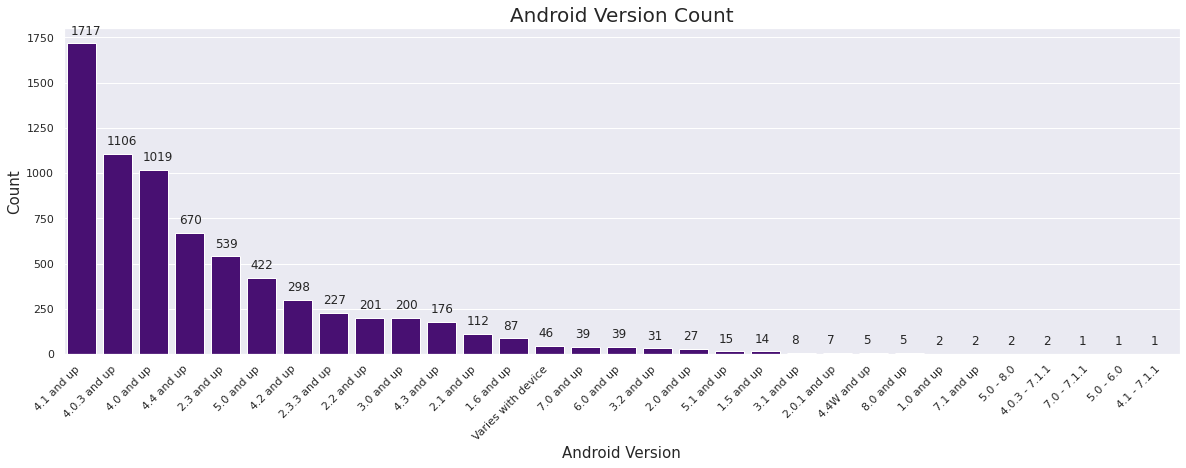

In [333]:
# Countplot for Android Version
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
ax=sns.countplot(play_store_app_data['Android Ver'],
                 color='indigo',order=play_store_app_data['Android Ver'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')
ax.set_xlabel('Android Version',size=15)
ax.set_ylabel('Count',size=15)
ax.set_title('Android Version Count',fontsize=20,weight=True)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [334]:
play_store_app_data.loc[:,'Android Ver'].describe()

count           7021
unique            31
top       4.1 and up
freq            1717
Name: Android Ver, dtype: object

In [335]:
ver_less_100=[]  # For Version's count less than 100
ver_more_100=[]  # For Version's count more than 100
for i in list(play_store_app_data['Android Ver'].unique()):
  if (play_store_app_data['Android Ver'][play_store_app_data['Android Ver'] == i].value_counts()).item() < 50:
    ver_less_100.append(i)
  else:
    ver_more_100.append(i)

In [336]:
print(f"Total Version types which have count less than 50 are:",len(ver_less_100))
print(ver_less_100)
print(f"Total Version types which have count more than 50 are:",len(ver_more_100))
print(ver_more_100)

Total Version types which have count less than 50 are: 18
['2.0.1 and up', '3.2 and up', '2.0 and up', '8.0 and up', '5.1 and up', '7.0 and up', '6.0 and up', 'Varies with device', '1.5 and up', '4.4W and up', '3.1 and up', '7.0 - 7.1.1', '1.0 and up', '7.1 and up', '5.0 - 6.0', '5.0 - 8.0', '4.0.3 - 7.1.1', '4.1 - 7.1.1']
Total Version types which have count more than 50 are: 13
['4.1 and up', '2.2 and up', '4.0 and up', '2.3.3 and up', '2.1 and up', '5.0 and up', '4.4 and up', '4.2 and up', '4.0.3 and up', '4.3 and up', '2.3 and up', '3.0 and up', '1.6 and up']


In [337]:
# DataFrame For Less than 100 Count
vercount_less_100=play_store_app_data[play_store_app_data['Android Ver'].isin(ver_less_100)]
# DataFrame For More than 100 Count
vercount_more_100=play_store_app_data[play_store_app_data['Android Ver'].isin(ver_more_100)]

In [338]:
vercount_less_50=vercount_less_100.groupby(['Android Ver'])['Installs'].mean().sort_values()
vercount_more_50=play_store_app_data[play_store_app_data['Android Ver'].isin(ver_more_100)].groupby(['Android Ver'])['Installs'].mean().sort_values()

In [339]:
vercount_more_50

Android Ver
2.2 and up      4.819084e+05
1.6 and up      5.332656e+05
4.3 and up      1.688513e+06
3.0 and up      2.057394e+06
2.3 and up      2.236735e+06
2.1 and up      2.816985e+06
2.3.3 and up    3.031583e+06
5.0 and up      3.124581e+06
4.2 and up      3.327592e+06
4.0.3 and up    4.107178e+06
4.4 and up      4.668429e+06
4.0 and up      5.616041e+06
4.1 and up      6.441428e+06
Name: Installs, dtype: float64

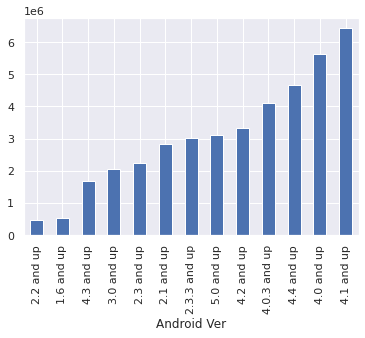

In [340]:
vercount_more_50.plot(kind='bar')

Text(0.5, 1.0, 'Android Version Vs Installs')

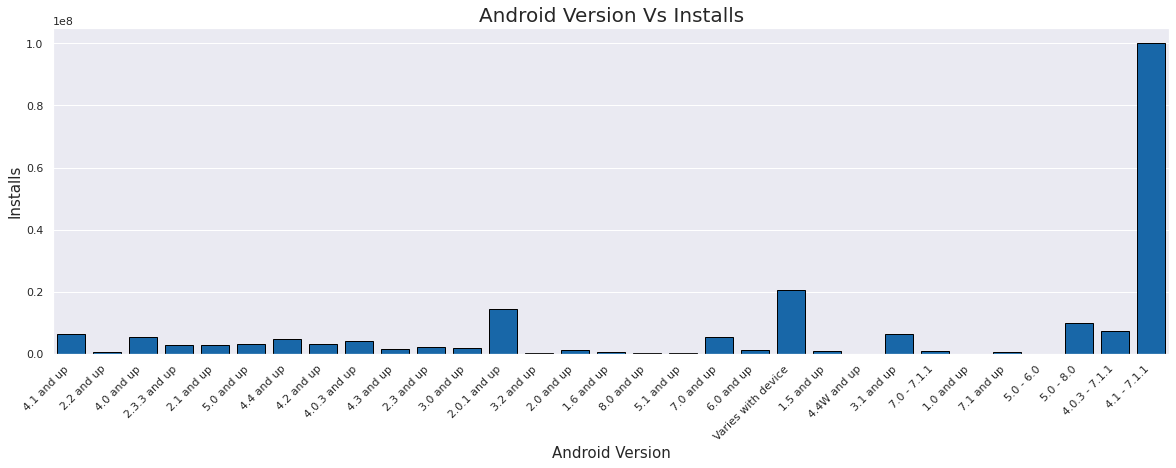

In [355]:
# Countplot for Android Version
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
ax=sns.barplot(x=play_store_app_data['Android Ver'],y=play_store_app_data['Installs'],
                 color='#0069c0',ci=None,edgecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')
ax.set_xlabel('Android Version',size=15)
ax.set_ylabel('Installs',size=15)
ax.set_title('Android Version Vs Installs',fontsize=20,weight=True)

# **BIVARIATE ANALYSIS**

## We have explored each variable individually.Now we can see the relation between the features,specifically with the "**Installs**" and "**Rating**".

### We can conclude from the above figure that the "Rating" is constant throughout the number of installations which is more than 4, although there are fewer "Paid" apps numbers as the number of installations crosses 5 Million. In other words, there are very few Paid apps with installations exceeding 5 Million.
### The small sized apps have clustered near the highest rating, or in other words, the small sized apps have the highest rating. However, size does not directly affect the rating of the app, as large sized apps have also got a rating around the average rating.

In [342]:
play_store_app_data[(play_store_app_data['Installs'] >= 5000000) & (play_store_app_data['Type'] == 'Paid')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
4034,Hitman Sniper,GAME,4.6,408292,29.0,10000000,Paid,0.99,Mature 17+,Action,12/07/18,1.7.110758,4.1 and up,2018


### It's clearly visible that there are only two apps who have  more than 5 million installations and falls under Paid type. Which shows us clear relationship between the "Installs" and "Type". Apps which are Free gets more installations.



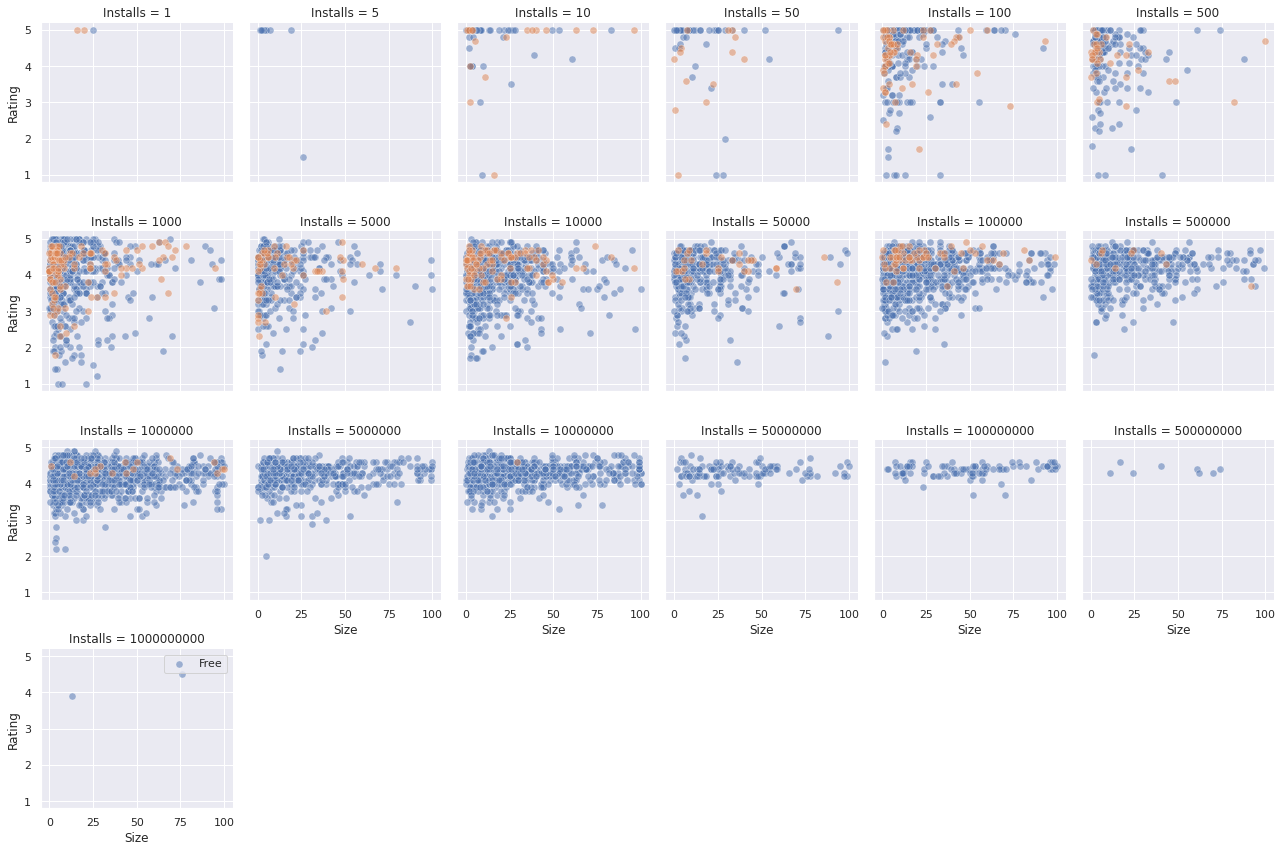

In [343]:
# Scatter plot for Size and Rating for Number of Installations
sns.set_style('darkgrid')
g=sns.FacetGrid(play_store_app_data,col='Installs',hue='Type',col_wrap=6,height=3,aspect=1)
g.map(sns.scatterplot,'Size','Rating',s=50,alpha=0.5)
plt.legend(bbox_to_anchor=(1,1))

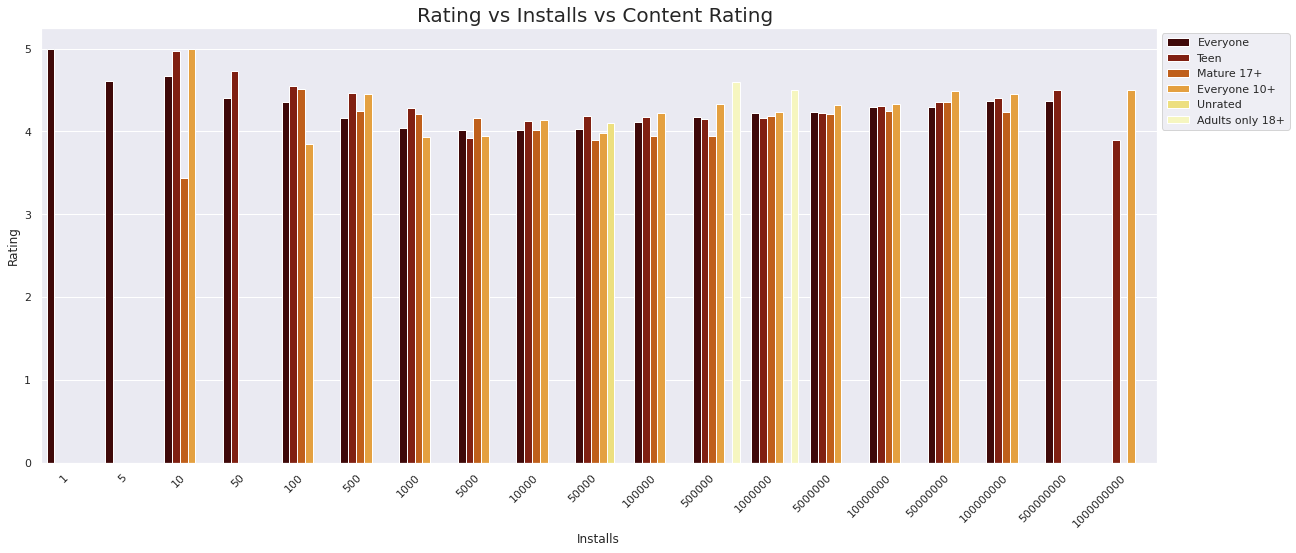

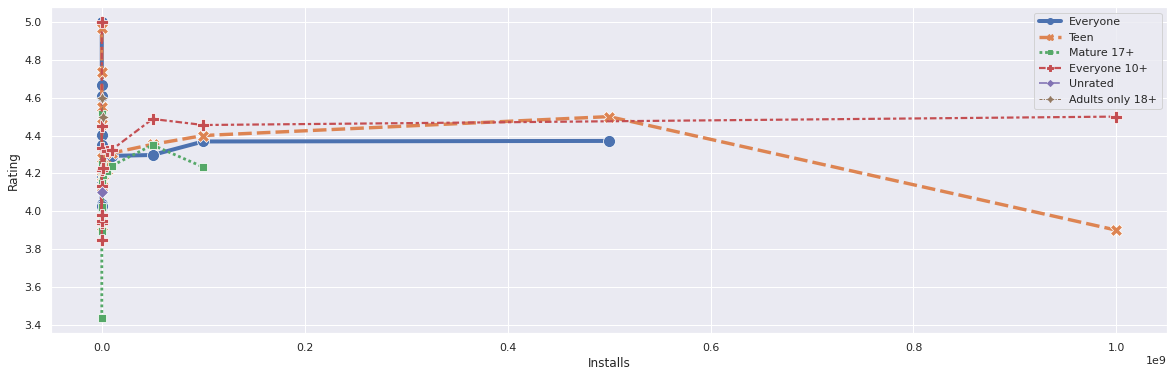

In [344]:
# barplot for App Installs 
plt.figure(figsize=(20,8))
sns.set(style='darkgrid')
ax = sns.barplot(x='Installs',y='Rating',hue='Content Rating',data=play_store_app_data,
                 palette='afmhot',edgecolor='white',ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')
ax.set_title('Rating vs Installs vs Content Rating ',fontsize=20)
plt.legend( bbox_to_anchor=(1,1))
plt.figure(figsize=(20,6))

# lineplot for Installs
axv = sns.lineplot(x='Installs', y='Rating', data=play_store_app_data,hue='Content Rating',
                  style='Content Rating',size='Content Rating',sizes=(1,4),ci=None,
                  markers=True,markersize=12)
plt.legend( bbox_to_anchor=(1,1))

" It's clearly visible from this figure apps with containg rating 'Teen' and 'Evryone 10+' have highets number of installations."

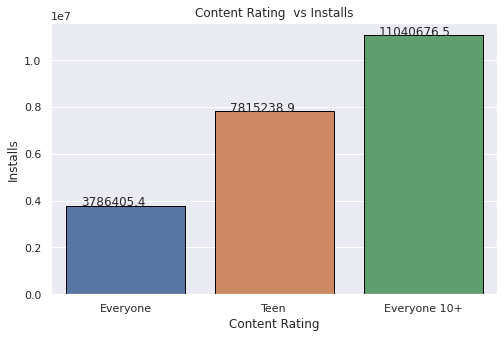

In [357]:
content_rating_df = play_store_app_data[(play_store_app_data['Content Rating'] == 'Everyone') | (play_store_app_data['Content Rating'] == 'Teen') | (play_store_app_data['Content Rating'] == 'Everyone 10+')]
plt.figure(figsize=(8,5))
ax=sns.barplot(content_rating_df['Content Rating'],y=content_rating_df['Installs'],ci=None,edgecolor='black')
plt.title('Content Rating  vs Installs')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

""" It's clearly visible from this figure apps with containg rating 'Teen' and 'Evryone 10+' have highets number of installations."""

### We observe significant relationships between the Install and Contain Rating in the above plots.Applications with content ratying type "**Everyone 10+**", "**Everyone**" and "**Teen**" have the most installations, with an average rating exceeding 4.2.

For specifics within these rating categories, "**Everyone 10+**" has the highest rating of more than **4.4** and also shows as a pattern that as the number of installations increases, the average rating also increases.

In second place, "**Everyone**" has an average rating between **4.2** and **4.4**, and in third place, "**Teen**" has an average rating around **4.2**, which slightly decreases as the number of installations rises.

A few apps with 1 Billion installations also fall into this category.



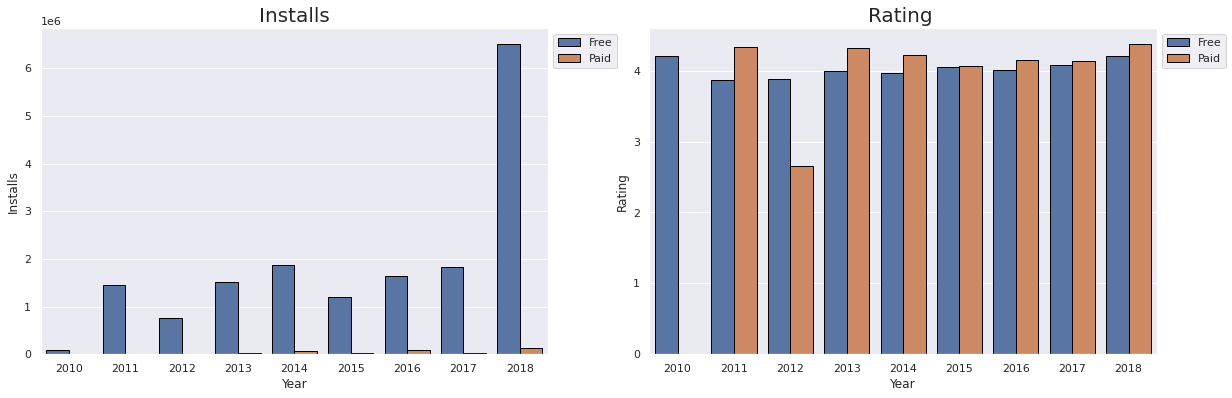

In [346]:
#Barplot for Installs and Rating per Year
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(play_store_app_data['Year'],y=play_store_app_data['Installs'],hue=play_store_app_data['Type'],edgecolor='black',ci=None)
plt.title('Installs',size=20)
plt.legend(bbox_to_anchor=(1,1))
plt.subplot(1,2,2)
sns.barplot(play_store_app_data['Year'],y=play_store_app_data['Rating'],hue=play_store_app_data['Type'],edgecolor='black',ci=None)
plt.title('Rating ',size=20)
plt.legend(bbox_to_anchor=(1,1))

### It's clearly visible that after the year 2017 the amount of installations has increased drastically about 5 times of previous years which shows us that newer app have more installations.

### Rating show no variatons throught the year it is mostly constant with lower standard deviation.However,Paid apps have little upper hand in Rating but it might be due to high difference in the numbers of app.

## Let's find out the relationship between the "**Installs**", "**Rating**" and "**Android Version**".

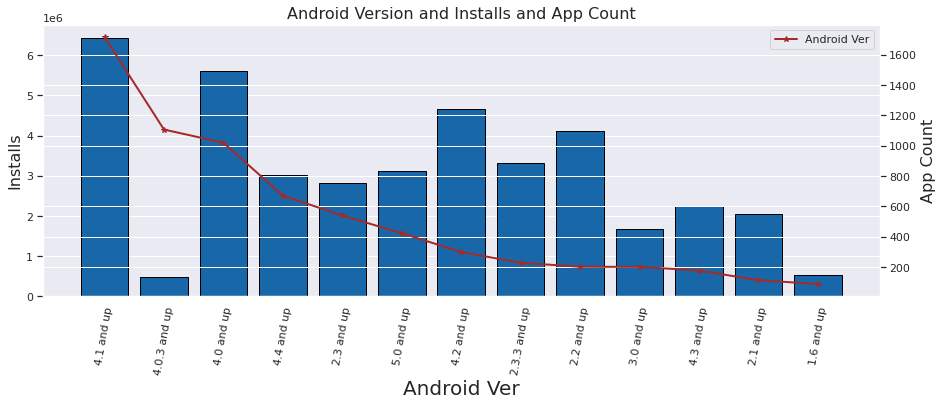

In [360]:
""" Creating A plot for count of apps for android version is more than 100 with mean installations"""
sns.set_style('darkgrid')
fig, ax1 = plt.subplots(figsize=(15,5))
color='Blue'
#bar plot creation
ax1.set_title('Android Version and Installs and App Count', fontsize=16)
ax1.set_xlabel('Android Ver', fontsize=20)
ax1.set_ylabel(' Installs', fontsize=16)
ax1=sns.barplot(x='Android Ver',y='Installs',data=vercount_more_100,color='#0069c0',ci=None,edgecolor='black')
plt.xticks(rotation=80)
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('App Count', fontsize=16)
ax2 = vercount_more_100['Android Ver'].value_counts().plot(kind='line',marker ='*',color='brown',linewidth=2)
plt.legend()


In the above graph we see that Android versions have over 100 apps, which indicates that users download more apps on Android versions that have greater flexibility. Another important characteristic of android versions is apps that can run on lower versions of Android also have many installations.

There are 13 different categories which have more than 100 app in it.

From the above plot we can conclude that android version category **'4.1 and up'** have most apps in it but category **'2.3.3 and up'** have much lower app count but significantlly higher mean installations number.

Let's deep dive into this android version categories and see why there is so much difference ?



## PAID APPLICATIONS

---


###  A huge potential is present in the Android mobile app development services for application development and earning money. An application is required to contain a brilliant idea and must have a huge amount of target audience to be successful and earn revenue over the Play store. By using proper strategies, the applications not only earn revenue over the Play Store but the cost of maintenance and development of the application is also reduced.

The payment method of the Google play store is based on a 70:30 payment ratio. It means that for the money the application makes 70% of the money go to the application owner and 30% of the money will be kept by the Google play store.



---
### Let's explore the "Paid" apps data to learn more about it.


In [348]:
print(f"Total number of paid applications in the dataset are:{paid_applications_df.shape[0]} which is \
 {round(((paid_applications_df.shape[0])/play_store_app_data.shape[0])*100,2)} % of the total data.")

Total number of paid applications in the dataset are:539 which is  7.68 % of the total data.


In [349]:
paid_app_top_cat=paid_applications_df.groupby(['Category'])['Installs'].mean().sort_values(ascending=False)

In [350]:
paid_applications_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
4127,Speech Therapy: F,FAMILY,1.0,1,16.0,10,Paid,2.99,Everyone,Education,10/07/16,1.0,2.3.3 and up,2016
7377,CI 174 Gray Icon Pack,PERSONALIZATION,5.0,1,46.0,10,Paid,0.99,Everyone,Personalization,21/05/18,1.1,4.1 and up,2018
8018,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,1,3.7,10,Paid,1.49,Everyone,Education,18/05/18,2.0.2,2.1 and up,2018
8236,LC-DB,PHOTOGRAPHY,3.0,1,2.5,10,Paid,3.49,Everyone,Photography,20/10/17,1.0,4.2 and up,2017
4477,Android P Style Icon Pack,PERSONALIZATION,5.0,1,60.0,100,Paid,0.99,Everyone,Personalization,16/06/18,1.0,4.1 and up,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,Card Wars - Adventure Time,FAMILY,4.3,129603,23.0,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,02/11/16,1.11.0,2.3.3 and up,2016
9678,Where's My Water?,FAMILY,4.7,188740,69.0,1000000,Paid,1.99,Everyone,Puzzle;Brain Games,07/05/18,1.16.0,4.2 and up,2018
8860,Bloons TD 5,FAMILY,4.6,190086,94.0,1000000,Paid,2.99,Everyone,Strategy,13/07/18,3.16,2.3.3 and up,2018
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,1000000,Paid,6.99,Mature 17+,Action,21/03/15,1.08,3.0 and up,2015


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

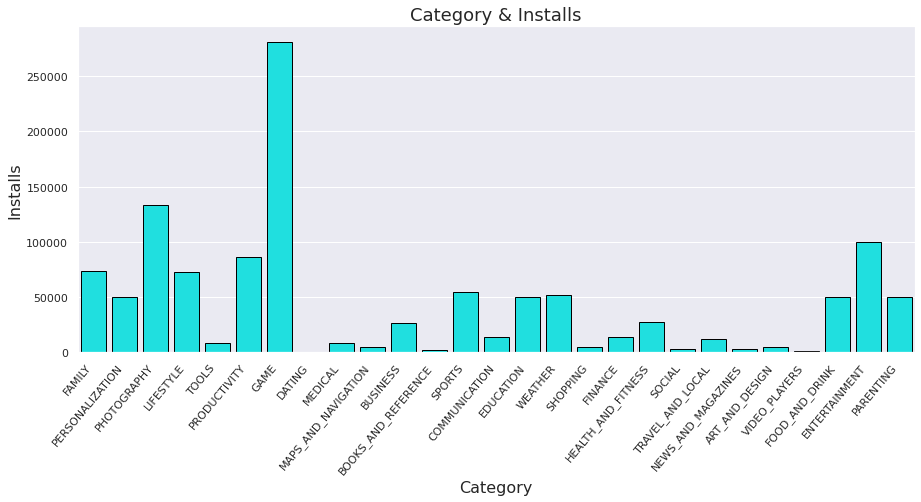

In [351]:
sns.set_style('darkgrid')
fig, ax1 = plt.subplots(figsize=(15,6))

#bar plot creation
ax1.set_title('Category & Installs', fontsize=18)
ax1.set_xlabel('Category', fontsize=16)
ax1.set_ylabel(' Installs', fontsize=16)
ax1 =sns.barplot(x='Category',y='Installs',data=paid_applications_df,color='cyan',ci=None,edgecolor='black')
plt.xticks(rotation=50,ha='right')
